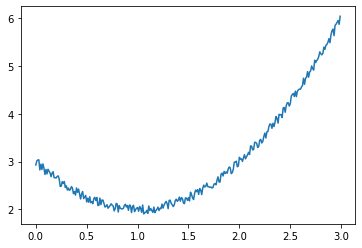

In [80]:
import torch
import numpy as np
from matplotlib import pyplot as plt 
torch.manual_seed(9)
def get_data(x,w,b,d):
    c,r = x.shape
    y = (w * x * x + b*x + d)+ (0.1*(2*np.random.rand(c,r)-1))
    return(y)

xs = np.arange(0,3,0.01).reshape(-1,1)

ys = get_data(xs,1,-2,3)
# print(dotsX , dotsY)
# dotsX = np.random().shuffle(dotsX)
# dotsY = np.random().shuffle(dotsY)
fig = plt.figure()
plt.plot(xs, ys)
plt.show()


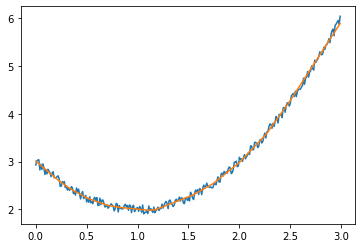

In [91]:
import torch.nn as NN
import torch.optim 

model = NN.Sequential(
    NN.Linear(1, 50),
    NN.ReLU(),
    NN.Linear(50, 1)
)
loss_fn = NN.MSELoss(reduction="sum")
optimizier = torch.optim.Adam(model.parameters(), lr= 1e-4)

losses = []
y_Pred = []
epoch = 15000
for i in range(epoch):
    y_pred = model(torch.tensor(xs, dtype=torch.float))
    y_Pred.append(y_pred)
    loss_tensor = loss_fn(y_pred, torch.tensor(ys,dtype=torch.float))
    
    loss = loss_tensor.item()
    losses.append(loss)
    
    optimizier.zero_grad()
    loss_tensor.backward()
    optimizier.step()

Y_pred = y_Pred[-1].detach().numpy().squeeze(1)

fig  = plt.figure()
fig.clear()
plt.plot(xs, ys)
plt.plot(xs, Y_pred)

plt.show()


    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[69 54 86 48 33 10 41 52 13  1  4 97 90 38 89  2 94 53 71 12 55 51 37 11
 26 85 46 57 15 47 28 30 82 61 19 45 16 22 73 59 60 29 39 32 95 23 62 24
  5 44 58 75 31 68 63 87 91 17 49 83 78 50 72 21 74  0 56 35  3 96 84 40
 20  7 42 65 76 18 27 81 43 98  6 77 92 14 70 79 25  8 80 67 36 88 99 34
 93 66 64  9]
